<a href="https://colab.research.google.com/github/mgiorgi13/brain_tumor_classifier/blob/mattia/CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLAHE experiments**

In this Jupyter Notebook, we will use the CLAHE (Contrast Limited Adaptive Histogram Equalization) method to improve the contrast and quality of images. CLAHE is a histogram equalization technique that dynamically adapts the image contrast based on the local pixel distribution.

Our goal is to enhance the visibility and details of images in our medical image dataset, which includes different categories such as glioma_tumor, meningioma_tumor, no_tumor, and pituitary_tumor. We will utilize the OpenCV library to apply the CLAHE transformation to grayscale images.


# **Importing Libraries**

In this paragraph, we have imported the necessary libraries to create the CNN. TensorFlow and Keras are the main frameworks that we will use to create the convolutional neural network. Additionally, we have imported other useful libraries such as OpenCV (cv2) for image preprocessing, PIL for image manipulation, and Matplotlib for image visualization.

In [1]:
import pickle
from keras.models import load_model
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization
import os
import glob
import shutil
from sklearn.utils import shuffle
import zipfile
import cv2
import imutils
import random as rn
from sklearn.preprocessing import LabelBinarizer
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn import metrics

# **Google Drive connection**

Necessary to run the classifier

In [2]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **CLAHE preprocessing**

Skip if it has already been done

In [3]:
# functino to apply CLAHE to an image
def apply_clahe(image_path, output_path):
    image = cv2.imread(image_path, 0)  # load the image in greyscale
    clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(4, 4))  # create a CLAHE object
    clahe_image = clahe.apply(image)  # perform CLAHE on the image
    cv2.imwrite(output_path, clahe_image)  # save the image

## Training set clahe preprocessing

In [4]:
dataset_path = "/content/drive/MyDrive/BrainTumorDataset/"

glioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Train/glioma_tumor/')
meningioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Train/meningioma_tumor/')
no_tumor_path = os.path.join(dataset_path, 'Preprocessed/Train/no_tumor/')
pituitary_tumor_path = os.path.join(dataset_path, 'Preprocessed/Train/pituitary_tumor/')

glioma_tumor_entries = os.listdir(glioma_tumor_path)
meningioma_entries = os.listdir(meningioma_tumor_path)
no_tumor_entries = os.listdir(no_tumor_path)
pituitary_tumor_entries = os.listdir(pituitary_tumor_path)

output_path = os.path.join(dataset_path, 'Preprocessed/CLAHE/')
os.makedirs(output_path, exist_ok=True)

In [5]:
# compute CLAHE for each image in the glioma_tumor folder
for entry in glioma_tumor_entries:
    image_path = os.path.join(glioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Train/glioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the meningioma_tumor folder
for entry in meningioma_entries:
    image_path = os.path.join(meningioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Train/meningioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the no_tumor folder
for entry in no_tumor_entries:
    image_path = os.path.join(no_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Train/no_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the pituitary_tumor folder
for entry in pituitary_tumor_entries:
    image_path = os.path.join(pituitary_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Train/pituitary_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)


## Validation set clahe preprocessing

In [6]:
dataset_path = "/content/drive/MyDrive/BrainTumorDataset/"

glioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Validation/glioma_tumor/')
meningioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Validation/meningioma_tumor/')
no_tumor_path = os.path.join(dataset_path, 'Preprocessed/Validation/no_tumor/')
pituitary_tumor_path = os.path.join(dataset_path, 'Preprocessed/Validation/pituitary_tumor/')

glioma_tumor_entries = os.listdir(glioma_tumor_path)
meningioma_entries = os.listdir(meningioma_tumor_path)
no_tumor_entries = os.listdir(no_tumor_path)
pituitary_tumor_entries = os.listdir(pituitary_tumor_path)

output_path = os.path.join(dataset_path, 'Preprocessed/CLAHE/')
os.makedirs(output_path, exist_ok=True)

In [7]:
# compute CLAHE for each image in the glioma_tumor folder
for entry in tqdm(glioma_tumor_entries):
    image_path = os.path.join(glioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Validation/glioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the meningioma_tumor folder
for entry in tqdm(meningioma_entries):
    image_path = os.path.join(meningioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Validation/meningioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the no_tumor folder
for entry in tqdm(no_tumor_entries):
    image_path = os.path.join(no_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Validation/no_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the pituitary_tumor folder
for entry in tqdm(pituitary_tumor_entries):
    image_path = os.path.join(pituitary_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Validation/pituitary_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)


100%|██████████| 180/180 [02:44<00:00,  1.09it/s]


## Test set clahe preprocessing

In [8]:
dataset_path = "/content/drive/MyDrive/BrainTumorDataset/"

glioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Test/glioma_tumor/')
meningioma_tumor_path = os.path.join(dataset_path, 'Preprocessed/Test/meningioma_tumor/')
no_tumor_path = os.path.join(dataset_path, 'Preprocessed/Test/no_tumor/')
pituitary_tumor_path = os.path.join(dataset_path, 'Preprocessed/Test/pituitary_tumor/')

glioma_tumor_entries = os.listdir(glioma_tumor_path)
meningioma_entries = os.listdir(meningioma_tumor_path)
no_tumor_entries = os.listdir(no_tumor_path)
pituitary_tumor_entries = os.listdir(pituitary_tumor_path)

output_path = os.path.join(dataset_path, 'Preprocessed/CLAHE/')
os.makedirs(output_path, exist_ok=True)

In [9]:
# compute CLAHE for each image in the glioma_tumor folder
for entry in tqdm(glioma_tumor_entries):
    image_path = os.path.join(glioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Test/glioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the meningioma_tumor folder
for entry in tqdm(meningioma_entries):
    image_path = os.path.join(meningioma_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Test/meningioma_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the no_tumor folder
for entry in tqdm(no_tumor_entries):
    image_path = os.path.join(no_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Test/no_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)

# compute CLAHE for each image in the pituitary_tumor folder
for entry in tqdm(pituitary_tumor_entries):
    image_path = os.path.join(pituitary_tumor_path, entry)
    output_subfolder = os.path.join(output_path, 'Test/pituitary_tumor/')
    os.makedirs(output_subfolder, exist_ok=True)
    output_image_path = os.path.join(output_subfolder, entry)
    apply_clahe(image_path, output_image_path)


100%|██████████| 180/180 [01:17<00:00,  2.31it/s]


# **Utilities**

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import backend as K
from itertools import cycle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

dataset_path = "/content/drive/MyDrive/BrainTumorDataset"

# path about the preprocessed dataset
base_path = "/content/drive/MyDrive/BrainTumorDataset/Preprocessed/Unified"

# path about test, train and validation sets
test_path = "/content/drive/MyDrive/BrainTumorDataset/Preprocessed/CLAHE/Test"
val_path = "/content/drive/MyDrive/BrainTumorDataset/Preprocessed/CLAHE/Validation"
train_path = "/content/drive/MyDrive/BrainTumorDataset/Preprocessed/CLAHE/Train"

models_path = "/content/drive/MyDrive/BrainTumorDataset/Models/CLAHE"
cnn_results_path = os.path.join(models_path, 'CNN')
vgg16_results_path = os.path.join(models_path, 'VGG16')
resnet50_results_path = os.path.join(models_path, 'ResNet50')
inceptionv3_results_path = os.path.join(models_path, 'InceptionV3')
# actual_results_path = vgg16_results_path

def set_seed ():
	''' 
	set_seed is used to obtain reproducible results using keras during the development phase
	'''
	seed = 10
	# The below is necessary for reproducible results of certain Python hash-based operations.
	os.environ["PYTHONHASHSEED"]="0"
	# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
	np.random.seed(seed)
	# The below is necessary for starting core Python generated random numbers in a well-defined state.
	rn.seed(seed)
	# The below tf.random.set_seed will make x number generation in TensorFlow have a well-defined initial state.
	tf.random.set_seed(seed)     

# image size
image_size = 224
batch_size = 32

# create the generators for data augmentation with rescaling
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# load train, test and validation sets
train_generator = data_generator.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = data_generator.flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = data_generator.flow_from_directory(
    val_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)
     

def show_training_and_validation_performance(history,path):
	'''
	show_training_and_validation_performance is used to plot the performances during the training phase
	:param history: object in which are recorded all the events
	'''
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']

	epochs = range(len(acc))

	plt.plot(epochs, acc, 'bo', label='Training accuracy')
	plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
	plt.title('Training and validation accuracy')
	plt.legend()

	plt.figure()

	plt.plot(epochs, loss, 'bo', label='Training loss')
	plt.plot(epochs, val_loss, 'b', label='Validation loss')
	plt.title('Training and validation loss')
	plt.legend()

	plt.savefig(path)

	plt.show()

def compile_model (model, optimizer='adam', learning_rate = 0.001):
	'''
	compile_model is used to compile the current model
	:param model: model to compile
	:param optimizer: optimizer to be used
	:param learning_rate: learning rate parameter for the optimizer
	'''
	if optimizer == 'adam':
		model.compile(loss="categorical_crossentropy",
		optimizer=optimizers.Adam(learning_rate=learning_rate),
		metrics=["accuracy"])
	elif optimizer == 'rmsprop':
		model.compile(loss="categorical_crossentropy",
					optimizer = optimizers.RMSprop(learning_rate=learning_rate),
					metrics=['accuracy'])
	model.summary()

def run_model (model, type, model_name, epochs = 100, patience=5, monitor='val_loss'):
	'''
	run_model is used to run the current mode
	:param model: model to run
	:param model_name: name given to save the model
	:param type: type of model, CNN, VGG16, ResNet50, InceptionV3
	:param epochs: how many epochs to do
	:param patience: patience value for Early Stopping
	:param monitor: what to monitor for Early Stopping and Model Checkpoint
	'''
	# local save path for the models
	save_path = os.path.join(models_path, type + '/' + model_name + '.h5') 
	callbacks_list = [
					keras.callbacks.EarlyStopping(monitor=monitor, patience=patience),
					keras.callbacks.ModelCheckpoint(
						filepath = save_path,
						monitor=monitor,
						verbose=1,
						save_best_only=True)
					]
	history = model.fit(train_generator,
						epochs=epochs,
						validation_data=val_generator,
						callbacks=callbacks_list)
	# save on Drive only the best model
	show_training_and_validation_performance(history,os.path.join(models_path, type + '/' + model_name + '_validation.png'))

def plot_roc_curve(y_true, y_pred, n_classes, class_labels, model_name, type):

    # label conversion to binary format
    lb = LabelBinarizer()
    y_true_binary = lb.fit_transform(y_true)

    # compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_true_binary[:, i], y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['blue', 'red', 'green', 'orange']  

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label='ROC curve {0} ({1:0.2f}%)'.format(class_labels[i], roc_auc[i]*100))

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(models_path, type + '/' + model_name + '_ROC.png'))
    plt.show()

def evaluate_model (model, test_generator, model_name, type):
	'''
	evaluate_model is used to plot some statistics about the performance on the test set
	:param model: model to consider
	'''
	labels_d= ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

	# get predictions
	y_score = model.predict(test_generator)
	# convert predictions to classes
	y_pred = np.argmax(y_score, axis=-1)
	# get true classes
	y_true = test_generator.classes
	# extract class labels
	class_labels = list(test_generator.class_indices.keys())
	
	print("Classification report: ")
	# create and show classification report
	print(metrics.classification_report(y_true, y_pred, target_names=class_labels,digits = 4))
	# save classification report
	with open(os.path.join(models_path, type + '/' + model_name + '_classification_report.txt'), 'w') as f:
		f.write(metrics.classification_report(y_true, y_pred, target_names=class_labels,digits = 4))

	# create and show confusion matrix	
	cm = confusion_matrix(y_true, y_pred)	
	disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
	disp.plot(xticks_rotation=45)
	
	# save confusion matrix
	plt.savefig(os.path.join(models_path, type, model_name + '_confusion_matrix.png'), bbox_inches='tight', pad_inches=0.1)
	plt.show()

	plot_roc_curve(y_true, y_score, 4, class_labels, model_name, type)

def get_index_by_layer_name(model, layer_name):
  '''
  get_index_by_layer_name is used to retrieve the index of a specific layer
  :param model: model to check
  :param layer_name: name of the layer we want to get the index of
  :return: the index of the layer named as defined in layer_name
  '''
  for index, layer in enumerate(model.layers):
      if layer.name == layer_name:
          return index 

def clear(model):
	del model
	K.clear_session() 

set_seed ()

Found 4520 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 652 images belonging to 4 classes.


# **CNN from scratch with CLAHE preprocessing**

Use the dataset with CLAHE preprocessing to train the CNN from scratch and evaluate if the CLAHE preprocessing improves the accuracy of the CNN models.

## Experiment 1

First CNN model with **one convolutional layer** and **one max pooling layer** at the biginning.

Than **one flatten layer** and **one dense layer** with 4 units (one for each class) and softmax activation function.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 4)                 1605636   
                                                                 
Total params: 1,606,532
Trainable params: 1,606,532
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
142/142 [==============================] - ETA: 0s - loss: 1.1029 - accuracy: 0.6407
Epoch 1: val_lo

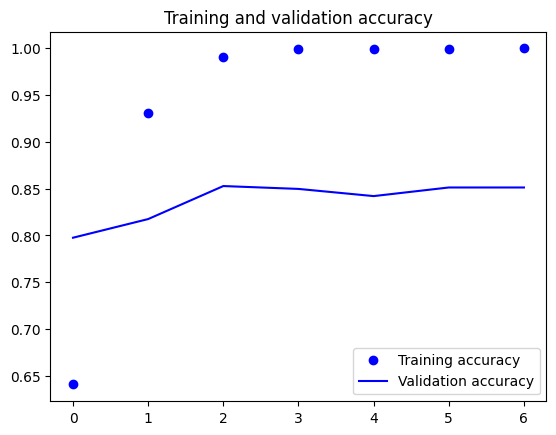

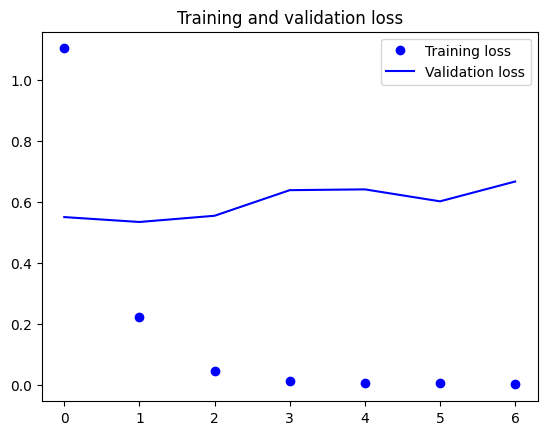

21/21 [==============================] - 3s 143ms/step
Classification report: 
                  precision    recall  f1-score   support

    glioma_tumor     0.9096    0.8162    0.8604       185
meningioma_tumor     0.8152    0.8021    0.8086       187
        no_tumor     0.7851    0.9500    0.8597       100
 pituitary_tumor     0.9392    0.9444    0.9418       180

        accuracy                         0.8681       652
       macro avg     0.8623    0.8782    0.8676       652
    weighted avg     0.8716    0.8681    0.8679       652



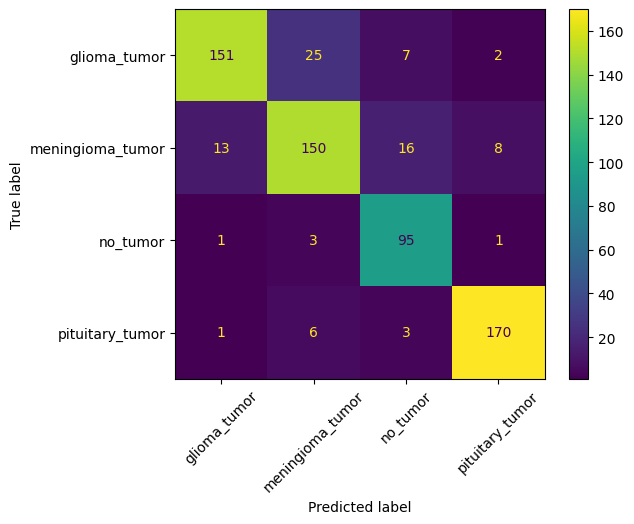

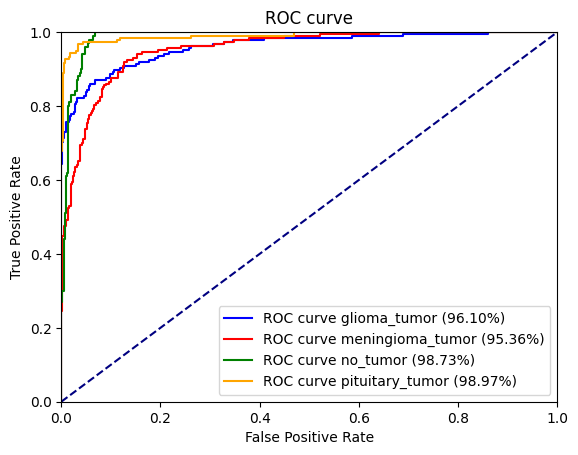

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

compile_model(model)

run_model(model, 'CNN', 'cnn_from_scratch_clahe_exp1')

evaluate_model(model,test_generator, 'cnn_from_scratch_clahe_exp1', 'CNN')

## Experiment 2

Second CNN model with **three convolutional layers** and **three max pooling layers** at the biginning.

Than **one flatten layer** and **one dense layer** with 256 units and softmax activation function.

We add a **dropout layer** with 0.5 probability to avoid overfitting.

At the end we add a **dense layer** with 4 units (one for each class) and softmax activation function.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 128)       

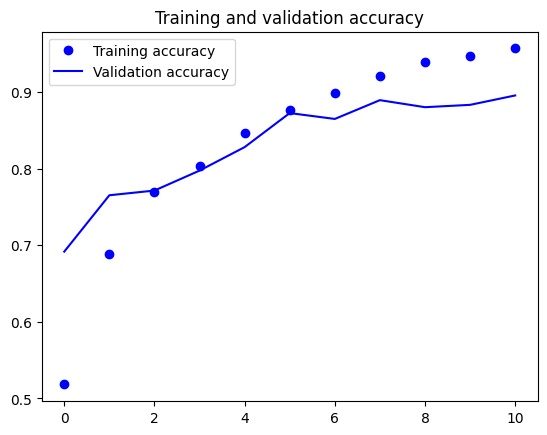

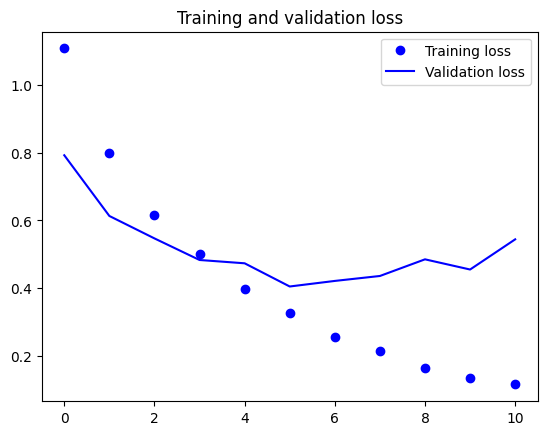

21/21 [==============================] - 3s 137ms/step
Classification report: 
                  precision    recall  f1-score   support

    glioma_tumor     0.9792    0.7622    0.8571       185
meningioma_tumor     0.7700    0.8770    0.8200       187
        no_tumor     0.8151    0.9700    0.8858       100
 pituitary_tumor     0.9602    0.9389    0.9494       180

        accuracy                         0.8758       652
       macro avg     0.8811    0.8870    0.8781       652
    weighted avg     0.8888    0.8758    0.8764       652



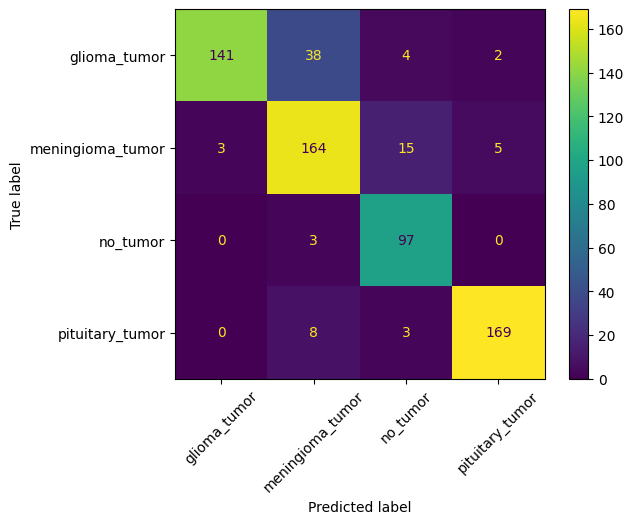

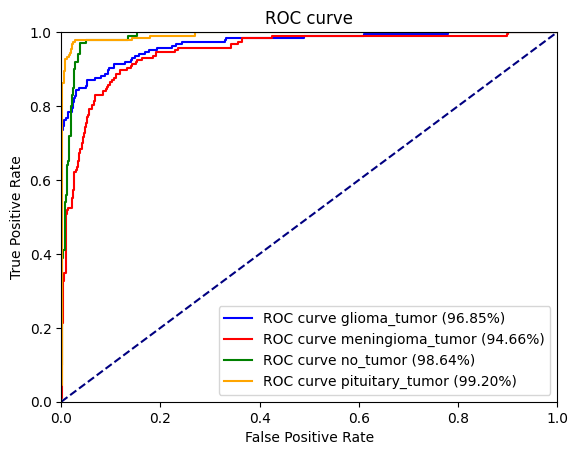

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

compile_model(model)

run_model(model, 'CNN','cnn_from_scratch_clahe_exp2')

evaluate_model(model,test_generator, 'cnn_from_scratch_clahe_exp2', 'CNN')

## Experiment 3

Third CNN model with **four convolutional layers** and **four max pooling layers** at the biginning.

Each of the max pooling layer have a **different pool size**.

Than **one flatten layer** and **one dense layer** with 256 units and softmax activation function.

We add a **dropout layer** with 0.5 probability to avoid overfitting.

At the end we add a **dense layer** with 4 units (one for each class) and softmax activation function. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 128)       

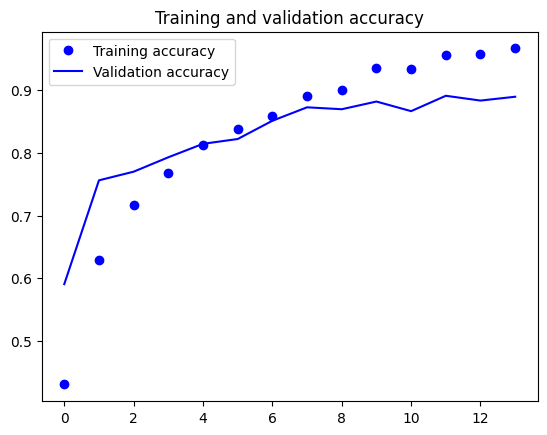

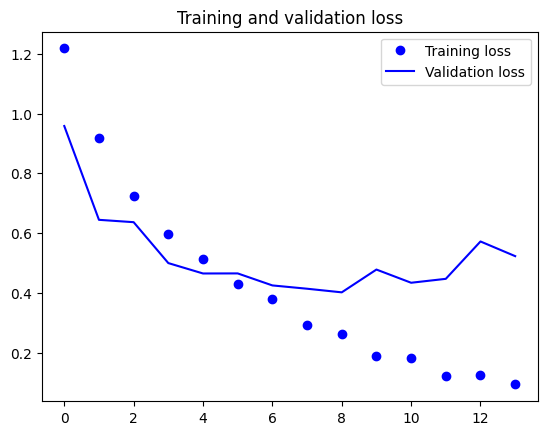

21/21 [==============================] - 3s 143ms/step
Classification report: 
                  precision    recall  f1-score   support

    glioma_tumor     0.9503    0.8270    0.8844       185
meningioma_tumor     0.8051    0.8396    0.8220       187
        no_tumor     0.7876    0.8900    0.8357       100
 pituitary_tumor     0.9344    0.9500    0.9421       180

        accuracy                         0.8742       652
       macro avg     0.8694    0.8766    0.8711       652
    weighted avg     0.8793    0.8742    0.8750       652



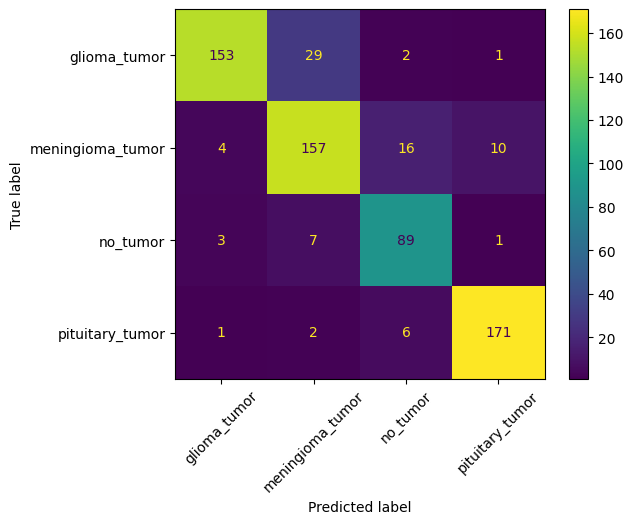

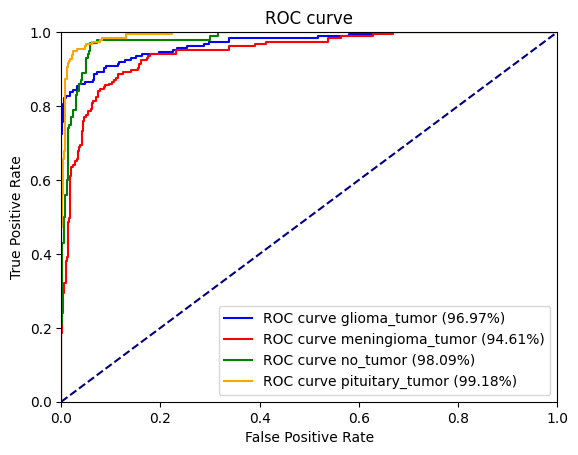

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((5, 5)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

compile_model(model)

run_model(model, 'CNN', 'cnn_from_scratch_clahe_exp3')

evaluate_model(model,test_generator, 'cnn_from_scratch_clahe_exp3', 'CNN')

## Experiment 4

Eighth CNN model with four convolutional layers and four max pooling layers at the biginning.

Now each of the max pooling layer have a different pool size.

Than one flatten layer and one dense layer with 512 units and softmax activation function.

We add a dropout layer with 0.5 probability to avoid overfitting.

At the end we add a dense layer with 4 units (one for each class) and softmax activation function.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 9, 9, 128)       

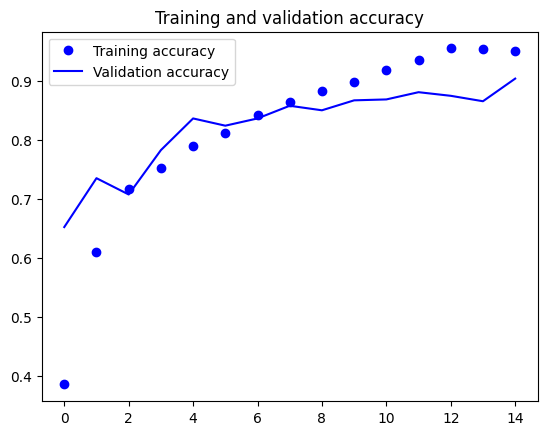

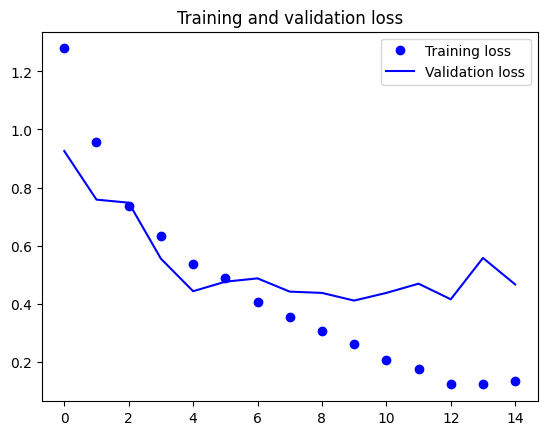

21/21 [==============================] - 3s 142ms/step
Classification report: 
                  precision    recall  f1-score   support

    glioma_tumor     0.9268    0.8216    0.8711       185
meningioma_tumor     0.8085    0.8128    0.8107       187
        no_tumor     0.7983    0.9500    0.8676       100
 pituitary_tumor     0.9448    0.9500    0.9474       180

        accuracy                         0.8742       652
       macro avg     0.8696    0.8836    0.8742       652
    weighted avg     0.8781    0.8742    0.8743       652



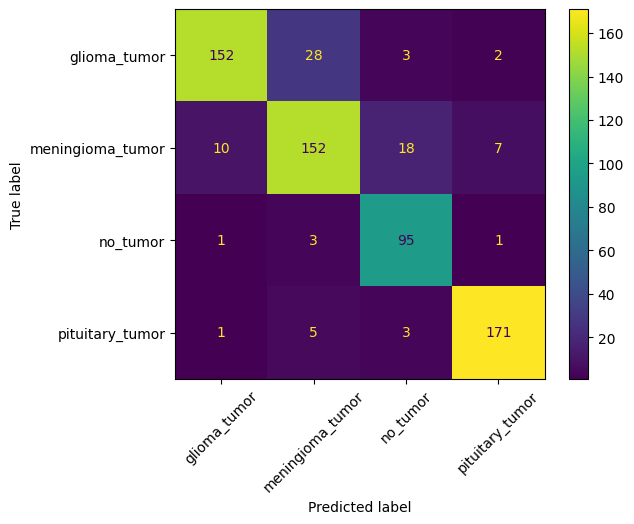

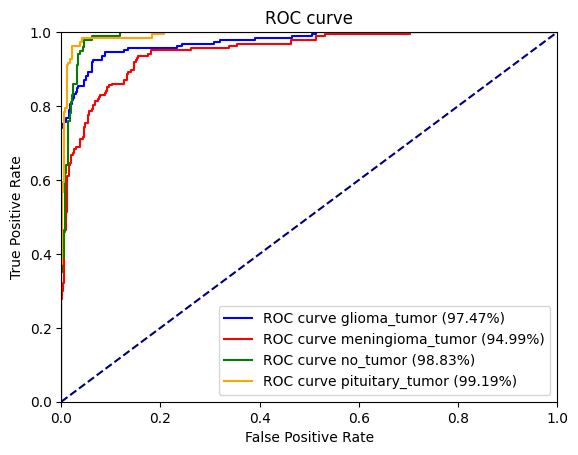

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((5, 5)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

compile_model(model)

run_model(model, 'CNN', 'cnn_from_scratch_clahe_exp8')

evaluate_model(model,test_generator, 'cnn_from_scratch_clahe_exp8', 'CNN')

## Experiment 5

Ninth CNN model with 3 convolutional layers and 3 max pooling layer at the biginning.


Now each of the max pooling layer have a different pool size.

Than one flatten layer and one dense layer with 512 units and softmax activation function.

Than one other dense layer with 256 units and softmax activation function.

We add a dropout layer with 0.5 probability to avoid overfitting.

At the end we add a dense layer with 4 units (one for each class) and softmax activation function.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 9, 9, 128)       

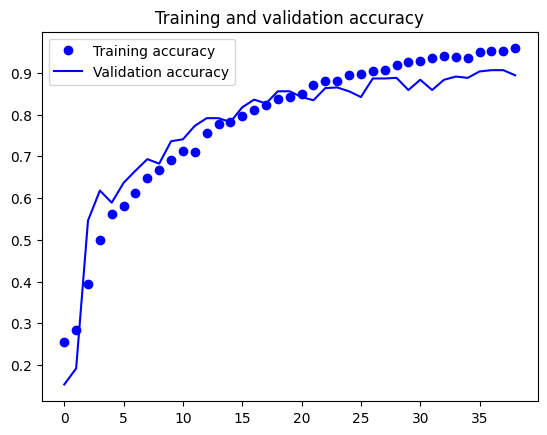

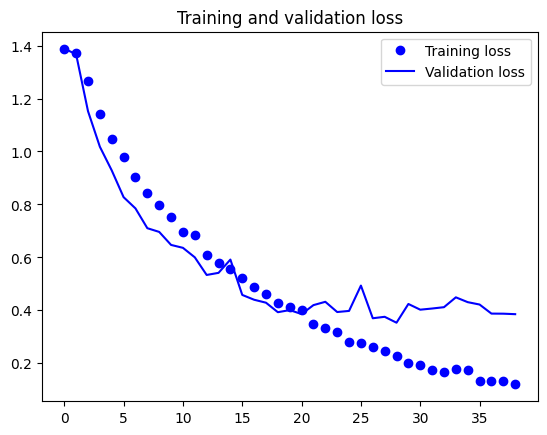

21/21 [==============================] - 3s 140ms/step
Classification report: 
                  precision    recall  f1-score   support

    glioma_tumor     0.8814    0.9243    0.9024       185
meningioma_tumor     0.8500    0.8182    0.8338       187
        no_tumor     0.9000    0.9000    0.9000       100
 pituitary_tumor     0.9663    0.9556    0.9609       180

        accuracy                         0.8988       652
       macro avg     0.8994    0.8995    0.8993       652
    weighted avg     0.8987    0.8988    0.8985       652



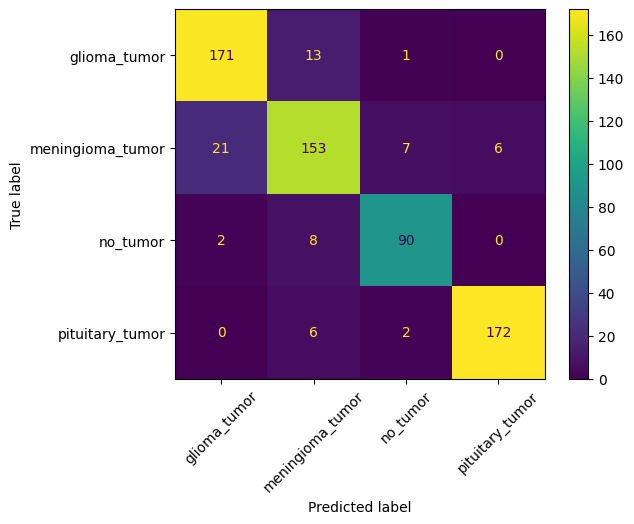

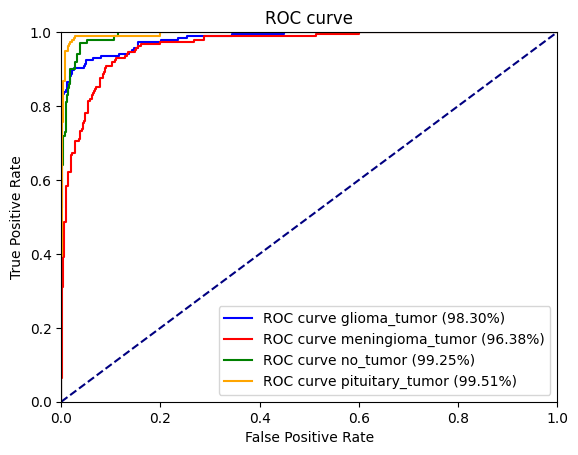

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((5, 5)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

compile_model(model,learning_rate=1e-4)

run_model(model, 'CNN', 'cnn_from_scratch_clahe_exp9',patience=10)

evaluate_model(model,test_generator, 'cnn_from_scratch_clahe_exp9', 'CNN')